In [129]:
import pandas as pd
import csv
from pandas import ExcelWriter
import re

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
df_translate = pd.read_excel('labelmanual_terbaru(2).xlsx')
df_translate

,Lemma,food,place,price,service,food sentiment,place sentiment,price sentiment,service sentiment
0,delicious food price appropriate restauran...,delicious,appropriate,NaN,NaN,positive,half positive,NaN,NaN
1,one place must visit go jakarta okay gather...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,food delicious price comparable taste comf...,delicious,NaN,comparable,NaN,positive,NaN,neutral,NaN
3,appropriate place gather family especially ...,NaN,appropriate,NaN,NaN,NaN,half positive,NaN,NaN
4,service good fast friendly delicious food ...,delicious,NaN,NaN,fast,positive,NaN,NaN,half positive
...,...,...,...,...,...,...,...,...,...
1735,visit ancol beach dinner bandar jakarta anc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,food bandar djakartar certain best food var...,NaN,NaN,cheap,NaN,NaN,NaN,half positive,NaN
1737,interesting place eat gather family locate ...,NaN,NaN,expensive,NaN,NaN,NaN,negative,NaN
1738,like seafood bandar jakarta place go go res...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
food_count  = df_translate['food'].apply(lambda x: x != '').sum()
place_count = df_translate['place'].apply(lambda x: x != '').sum()
service_count =df_translate['service'].apply(lambda x: x != '').sum()
price_count = df_translate['price'].apply(lambda x: x != '').sum()
print(f'food = {food_count}')
print(f'place = {place_count}')
print(f'service = {service_count}')
print(f'price = {price_count}')

food = 1740
place = 1740
service = 1740
price = 1740


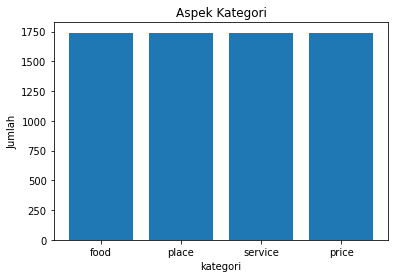

In [133]:
import matplotlib.pyplot as plt

# Create a list of the counts
counts = [food_count, place_count, service_count, price_count]

# Create a list of the categories
categories = ['food', 'place', 'service', 'price']

# Create the bar chart
plt.bar(categories, counts)

# Add a title and axis labels
plt.title('Aspek Kategori')
plt.xlabel('kategori')
plt.ylabel('Jumlah')

# Show the chart
plt.show()


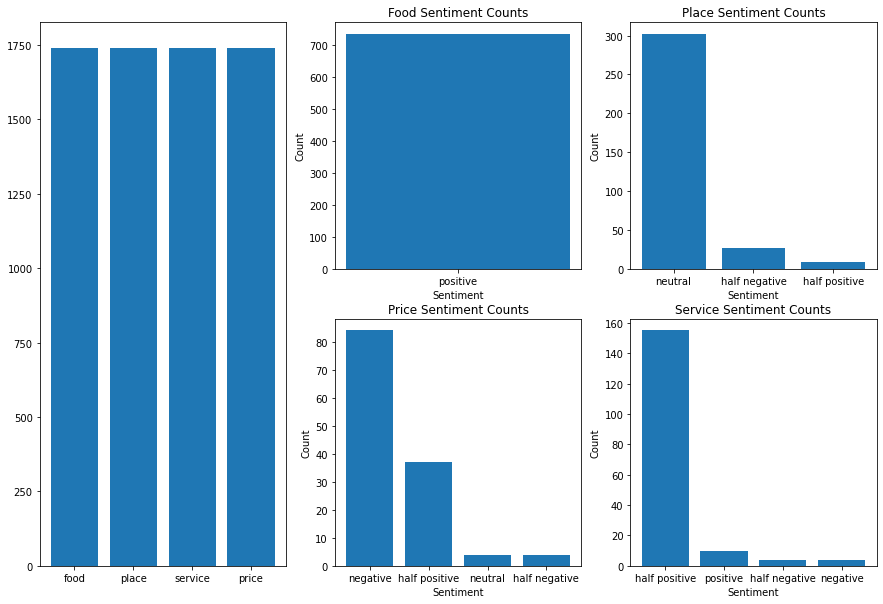

In [134]:
import matplotlib.pyplot as plt

# create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

counts = [food_count, place_count, service_count, price_count]
categories = ['food', 'place', 'service', 'price']

plt.subplot2grid((2,3), (0,0), rowspan = 3, colspan = 1).bar(categories, counts)

# plot the food sentiment counts in the first subplot
food_sentiment_counts = df_translate['food sentiment'].value_counts()
axs[0,1].bar(food_sentiment_counts.index, food_sentiment_counts.values)
axs[0,1].set_title('Food Sentiment Counts')
axs[0,1].set_xlabel('Sentiment')
axs[0,1].set_ylabel('Count')

# plot the place sentiment counts in the second subplot
place_sentiment_counts = df_translate['place sentiment'].value_counts()
axs[0,2].bar(place_sentiment_counts.index, place_sentiment_counts.values)
axs[0,2].set_title('Place Sentiment Counts')
axs[0,2].set_xlabel('Sentiment')
axs[0,2].set_ylabel('Count')

# plot the price sentiment counts in the third subplot
price_sentiment_counts = df_translate['price sentiment'].value_counts()
axs[1, 1].bar(price_sentiment_counts.index, price_sentiment_counts.values)
axs[1, 1].set_title('Price Sentiment Counts')
axs[1, 1].set_xlabel('Sentiment')
axs[1, 1].set_ylabel('Count')

# plot the service sentiment counts in the fourth subplot
service_sentiment_counts = df_translate['service sentiment'].value_counts()
axs[1, 2].bar(service_sentiment_counts.index, service_sentiment_counts.values)
axs[1, 2].set_title('Service Sentiment Counts')
axs[1, 2].set_xlabel('Sentiment')
axs[1, 2].set_ylabel('Count')

# show the figure
plt.show()


In [135]:
tb_counter_food = df_translate['food sentiment'].value_counts()
tb_counter_place = df_translate['place sentiment'].value_counts()
tb_counter_price = df_translate['price sentiment'].value_counts()
tb_counter_service = df_translate['service sentiment'].value_counts()

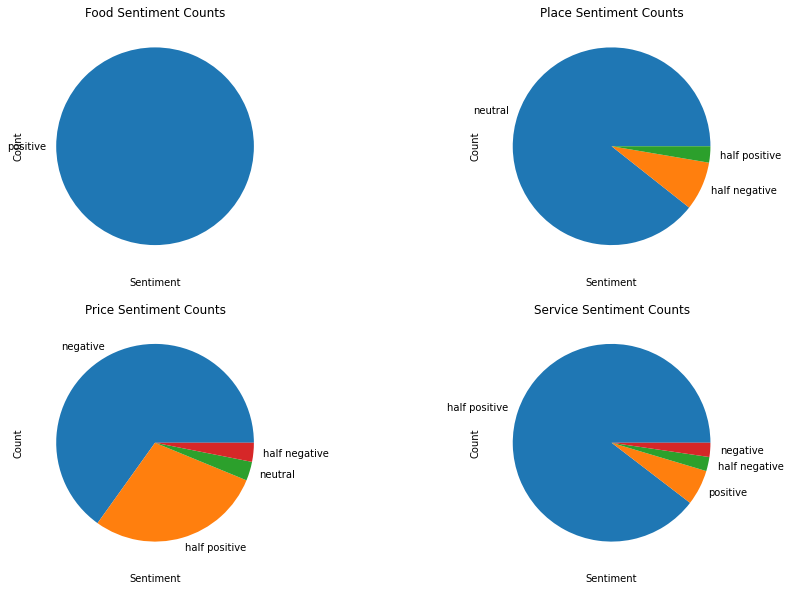

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline


import matplotlib.pyplot as plt

# create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

food_sentiment_counts = df_translate['food sentiment'].value_counts()
axs[0,0].pie(tb_counter_food.values, labels=tb_counter_food.index, )
axs[0,0].set_title('Food Sentiment Counts')
axs[0,0].set_xlabel('Sentiment')
axs[0,0].set_ylabel('Count')

# plot the place sentiment counts in the second subplot
place_sentiment_counts = df_translate['place sentiment'].value_counts()
axs[0,1].pie(tb_counter_place.values, labels=tb_counter_place.index, )
axs[0,1].set_title('Place Sentiment Counts')
axs[0,1].set_xlabel('Sentiment')
axs[0,1].set_ylabel('Count')

# plot the price sentiment counts in the third subplot
price_sentiment_counts = df_translate['price sentiment'].value_counts()
axs[1, 0].pie(tb_counter_price.values, labels=tb_counter_price.index, )
axs[1, 0].set_title('Price Sentiment Counts')
axs[1, 0].set_xlabel('Sentiment')
axs[1, 0].set_ylabel('Count')

# plot the service sentiment counts in the fourth subplot
service_sentiment_counts = df_translate['service sentiment'].value_counts()
axs[1, 1].pie(tb_counter_service.values, labels=tb_counter_service.index, )
axs[1, 1].set_title('Service Sentiment Counts')
axs[1, 1].set_xlabel('Sentiment')
axs[1, 1].set_ylabel('Count')

# show the figure
plt.show()

In [137]:
import pandas as pd
import numpy as np

# Define the categories of sentiment
sentiment_categories = {
    "negative": -1,
    "half negative": -0.5,
    "neutral": 0,
    "half positive": 0.5,
    "positive": 1,
    np.nan: 0  # add a sentiment value for NaN
}

# Load your data into a Pandas DataFrame
df = df_translate

# Calculate the average sentiment score for each category
df["food sentiment score"] = df["food sentiment"].apply(lambda sentiment: sentiment_categories[sentiment])
df["place sentiment score"] = df["place sentiment"].apply(lambda sentiment: sentiment_categories[sentiment])
df["price sentiment score"] = df["price sentiment"].apply(lambda sentiment: sentiment_categories[sentiment])
df["service sentiment score"] = df["service sentiment"].apply(lambda sentiment: sentiment_categories[sentiment])
df["average sentiment score"] = df[["food sentiment score", "place sentiment score", "price sentiment score", "service sentiment score"]].mean(axis=1)

# Assign a sentiment label to each row based on the average sentiment score
df["sentiment label"] = df["average sentiment score"].apply(lambda score: "negative" if score < -0.5 else "half negative" if -0.5 <= score < 0 else "neutral" if pd.isna(score) else "half positive" if 0 < score <= 0.5 else "positive")

# Print the resulting DataFrame
df

,Lemma,food,place,price,service,food sentiment,place sentiment,price sentiment,service sentiment,food sentiment score,place sentiment score,price sentiment score,service sentiment score,average sentiment score,sentiment label
0,delicious food price appropriate restauran...,delicious,appropriate,NaN,NaN,positive,half positive,NaN,NaN,1,0.5,0.0,0.0,0.375,half positive
1,one place must visit go jakarta okay gather...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.000,positive
2,food delicious price comparable taste comf...,delicious,NaN,comparable,NaN,positive,NaN,neutral,NaN,1,0.0,0.0,0.0,0.250,half positive
3,appropriate place gather family especially ...,NaN,appropriate,NaN,NaN,NaN,half positive,NaN,NaN,0,0.5,0.0,0.0,0.125,half positive
4,service good fast friendly delicious food ...,delicious,NaN,NaN,fast,positive,NaN,NaN,half positive,1,0.0,0.0,0.5,0.375,half positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,visit ancol beach dinner bandar jakarta anc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.000,positive
1736,food bandar djakartar certain best food var...,NaN,NaN,cheap,NaN,NaN,NaN,half positive,NaN,0,0.0,0.5,0.0,0.125,half positive
1737,interesting place eat gather family locate ...,NaN,NaN,expensive,NaN,NaN,NaN,negative,NaN,0,0.0,-1.0,0.0,-0.250,half negative
1738,like seafood bandar jakarta place go go res...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.000,positive


In [138]:
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df["Lemma"])

# Convert the text data into sequences of numerical values
train_sequences = tokenizer.texts_to_sequences(train_df["Lemma"])
test_sequences = tokenizer.texts_to_sequences(test_df["Lemma"])

train_df

,Lemma,food,place,price,service,food sentiment,place sentiment,price sentiment,service sentiment,food sentiment score,place sentiment score,price sentiment score,service sentiment score,average sentiment score,sentiment label
0,delicious food price appropriate restauran...,delicious,appropriate,NaN,NaN,positive,half positive,NaN,NaN,1,0.5,0.0,0.0,0.375,half positive
1,one place must visit go jakarta okay gather...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.000,positive
2,food delicious price comparable taste comf...,delicious,NaN,comparable,NaN,positive,NaN,neutral,NaN,1,0.0,0.0,0.0,0.250,half positive
3,appropriate place gather family especially ...,NaN,appropriate,NaN,NaN,NaN,half positive,NaN,NaN,0,0.5,0.0,0.0,0.125,half positive
4,service good fast friendly delicious food ...,delicious,NaN,NaN,fast,positive,NaN,NaN,half positive,1,0.0,0.0,0.5,0.375,half positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,love dish place open area also see beach e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.000,positive
1388,comfortable place calm ancol beach advantage...,delicious,NaN,NaN,NaN,positive,NaN,NaN,NaN,1,0.0,0.0,0.0,0.250,half positive
1389,spacious dining room still sufficient visito...,delicious,NaN,NaN,NaN,positive,NaN,NaN,NaN,1,0.0,0.0,0.0,0.250,half positive
1390,delicious food type seafood seasoning even ...,delicious,NaN,NaN,NaN,positive,NaN,NaN,NaN,1,0.0,0.0,0.0,0.250,half positive


In [139]:


# Define the sentiment label to integer mapping
sentiment_to_label = {"negative": 0, "half negative": 1, "neutral": 2, "half positive": 3, "positive": 4}

# Define the LSTM model architecture
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(seq) for seq in sequences)
embedding_size = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=len(sentiment_labels), activation="softmax"))



# Convert the sentiment labels to one-hot encoded vectors
train_labels = to_categorical(train_df["sentiment label"].map(sentiment_to_label).values)
test_labels = to_categorical(test_df["sentiment label"].map(sentiment_to_label).values)

# Pad the sequences to a fixed length
train_data = pad_sequences(sequences=train_sequences, maxlen=max_length)
test_data = pad_sequences(sequences=test_sequences, maxlen=max_length)
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
# Train the model
batch_size = 32
epochs = 10
history=model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_labels))


# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)
print("Test loss:", loss)
print("Test accuracy:", accuracy)




Epoch 1/10
44/44 [==============================] - 10s 158ms/step - loss: 1.4468 - accuracy: 0.5122 - val_loss: 1.3547 - val_accuracy: 0.2845
Epoch 2/10
44/44 [==============================] - 7s 150ms/step - loss: 1.1638 - accuracy: 0.5129 - val_loss: 1.1762 - val_accuracy: 0.2845
Epoch 3/10
44/44 [==============================] - 6s 127ms/step - loss: 0.9590 - accuracy: 0.5129 - val_loss: 1.0937 - val_accuracy: 0.2845
Epoch 4/10
44/44 [==============================] - 8s 177ms/step - loss: 0.8740 - accuracy: 0.5129 - val_loss: 1.0870 - val_accuracy: 0.2845
Epoch 5/10
44/44 [==============================] - 5s 122ms/step - loss: 0.8469 - accuracy: 0.5101 - val_loss: 1.0883 - val_accuracy: 0.2845
Epoch 6/10
44/44 [==============================] - 8s 181ms/step - loss: 0.8372 - accuracy: 0.5093 - val_loss: 1.0865 - val_accuracy: 0.2845
Epoch 7/10
44/44 [==============================] - 5s 122ms/step - loss: 0.8311 - accuracy: 0.5043 - val_loss: 1.0712 - val_accuracy: 0.2845
Epoch

Text(0, 0.5, 'Loss')

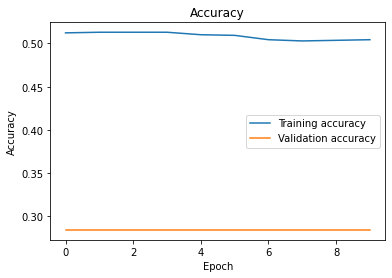

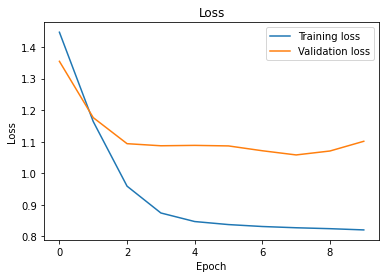

In [140]:
import matplotlib.pyplot as plt


# Extract the accuracy and loss values from the history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy and loss curves
plt.figure()
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.figure()
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [142]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the predicted sentiment labels
predicted_labels = np.argmax(model.predict(test_data), axis=1)

# Get the true sentiment labels
true_labels = np.argmax(test_labels, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion matrix:")
print(conf_matrix)


11/11 [==============================] - 0s 33ms/step
Confusion matrix:
[[  0  35   0]
 [  0  99   0]
 [  0 214   0]]


11/11 [==============================] - 0s 36ms/step


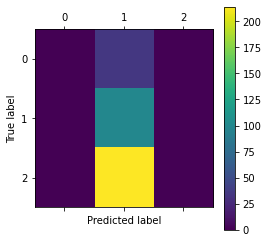

In [145]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the predicted probabilities for the test data
y_pred_prob = model.predict(test_data)

# Convert predicted probabilities to predicted labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get the true labels for the test data
y_true = np.argmax(test_labels, axis=1)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.matshow(confusion_mat)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
data_predict = pd.read_excel('dataPredictTripadvisorFIXXTranslate_baru (1).xlsx')
data_predict
df=data_predict

In [141]:
# Define the label-to-sentiment dictionary
label_to_sentiment = {0: 'negative', 1: 'half negative', 2: 'neutral', 3: 'half positive', 4: 'positive'}

# Create a new column to store the predicted sentiment labels
df["predicted_sentiment"] = ""

# Preprocess the data
sequences = tokenizer.texts_to_sequences(data_predict["Translate"])
data_predicts = pad_sequences(sequences, maxlen=max_length)

# Make predictions on the data and store the predicted sentiment labels in the new column
for i in range(len(data_predicts)):
    prediction = model.predict(data_predicts[i:i+1])[0]
    sentiment_label = np.argmax(prediction)
    sentiment = label_to_sentiment[sentiment_label]
    df.at[i, "predicted_sentiment"] = sentiment

# Print the dataframe with the predicted sentiment labels
print(df.head())
